### Preparação dos dados

In [19]:
import pandas as pd
pd.set_option('display.max_columns', 39)

dados = pd.read_csv('churn.txt') 
traducao_dic = {'Sim':1, 'Nao':0}
dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [20]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

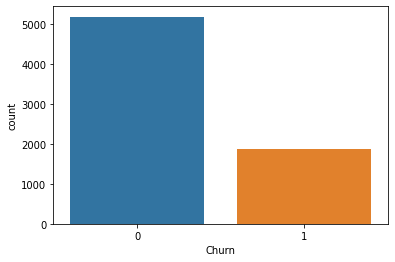

In [21]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [12]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

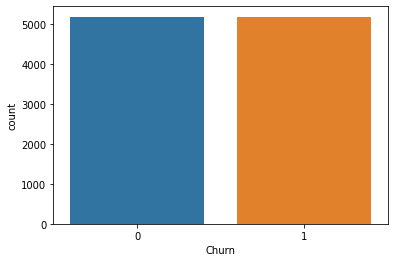

In [23]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

#verificação de balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [24]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

### Modelo K-nearest neighbors (KNN)

In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))

a = Xmaria_normalizado
b = X_normalizado[0]

np.sqrt(np.sum(np.square(a-b)))

9.57651505585138

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)
predito_knn

predito_maria = knn.predict(Xmaria)
predito_maria

array([1], dtype=int64)

### Modelo Bernoulli Naive Bayes

In [57]:
from sklearn.naive_bayes import BernoulliNB

#criamos o modelo
bnb = BernoulliNB(binarize=np.median(X_treino))

#treinar o modelo
bnb.fit(X_treino, y_treino)

#testar o modelo
predito_BNb = bnb.predict(X_teste)
predito_BNb

predito_maria = bnb.predict(Xmaria)
predito_maria

array([0], dtype=int64)

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

#treinar o modelo
dtc.fit(X_treino, y_treino)


predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

predito_maria = dtc.predict(Xmaria)
predito_maria

array([0], dtype=int64)

### Validação dos modelos

In [47]:
from sklearn.metrics import confusion_matrix

# Verdadeiro Positivo    Falso Negativo
# Falso Positivo         Verdadeiro Nagativo

print(confusion_matrix(y_teste, predito_knn))
print(confusion_matrix(y_teste, predito_BNb))
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1240  329]
 [ 247 1289]]
[[1048  521]
 [ 240 1296]]
[[1240  329]
 [ 273 1263]]


A acurácia é utilizada quando queremos saber a performance geral do modelo, isto é, dentre todas as classificações realizadas, quantas foram classificadas corretamente pelo modelo.

In [49]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_teste, predito_knn)
bnb_accuracy = accuracy_score(y_teste, predito_BNb)
tree_accuracy = accuracy_score(y_teste, predito_ArvoreDecisao)

print("knn_accuracy:", knn_accuracy)
print("bnb_accuracy:", bnb_accuracy)
print("tree_accuracy:", tree_accuracy)


knn_accuracy: 0.8144927536231884
bnb_accuracy: 0.7549114331723027
tree_accuracy: 0.8061191626409018


A precisão é utilizada quando queremos saber dentre todas as classificações de classe Positivo realizadas pelo modelo, quantas estão corretas.

In [50]:
from sklearn.metrics import precision_score

knn_precision = precision_score(y_teste, predito_knn)
bnb_precision = precision_score(y_teste, predito_BNb)
tree_precision = precision_score(y_teste, predito_ArvoreDecisao)

print("knn_precision:", knn_precision)
print("bnb_precision:", bnb_precision)
print("tree_precision:", tree_precision)

knn_accuracy: 0.7966625463535228
bnb_accuracy: 0.71326362135388
tree_accuracy: 0.7933417085427136


In [52]:
from sklearn.metrics import recall_score

knn_recall = recall_score(y_teste, predito_knn)
bnb_recall = recall_score(y_teste, predito_BNb)
tree_recall = recall_score(y_teste, predito_ArvoreDecisao)

print("knn_recall:", knn_recall)
print("bnb_recall:", bnb_recall)
print("tree_recall:", tree_recall)

knn_recall: 0.8391927083333334
bnb_recall: 0.84375
tree_recall: 0.822265625
